In [11]:
%load_ext autoreload
%autoreload 2

import json
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
with open("../results/alignment_tax_v2.03.json", "r") as f:
    results1 = json.load(f)

with open("../results/alignment_tax_v2.04.json", "r") as f:
    results2 = json.load(f)

with open("../results/alignment_tax_v2.05.json", "r") as f:
    results3 = json.load(f)

In [17]:
def get_scores(results):
    metrics = ("top1_acc", "top10_acc", "skip50_top1_acc", "skip50_top10_acc")
    modes = ("only_text", "only_code")
    injection_coefficients = list(results["only_code"].keys())

    scores = {}
    for mode in modes:
        scores[mode] = {}
        for metric in metrics:
            scores[mode][metric] = {"avg": [], "rel": []}
            for ic in injection_coefficients:
                if metric in ("top1_acc", "top10_acc"):
                    scores[mode][metric]["avg"].append(100*np.average(results[mode][ic][metric], weights=results[mode][ic]["total_encoded_tokens"]))
                else:
                    scores[mode][metric]["avg"].append(100*np.average(results[mode][ic][metric], weights=results[mode][ic]["total_tokens_with_skip"]))
            avg_scores = scores[mode][metric]["avg"]
            scores[mode][metric]["rel"] = [i/avg_scores[0]*100 for i in avg_scores]
    return scores

In [18]:
scores1, scores2 = get_scores(results1), get_scores(results2)

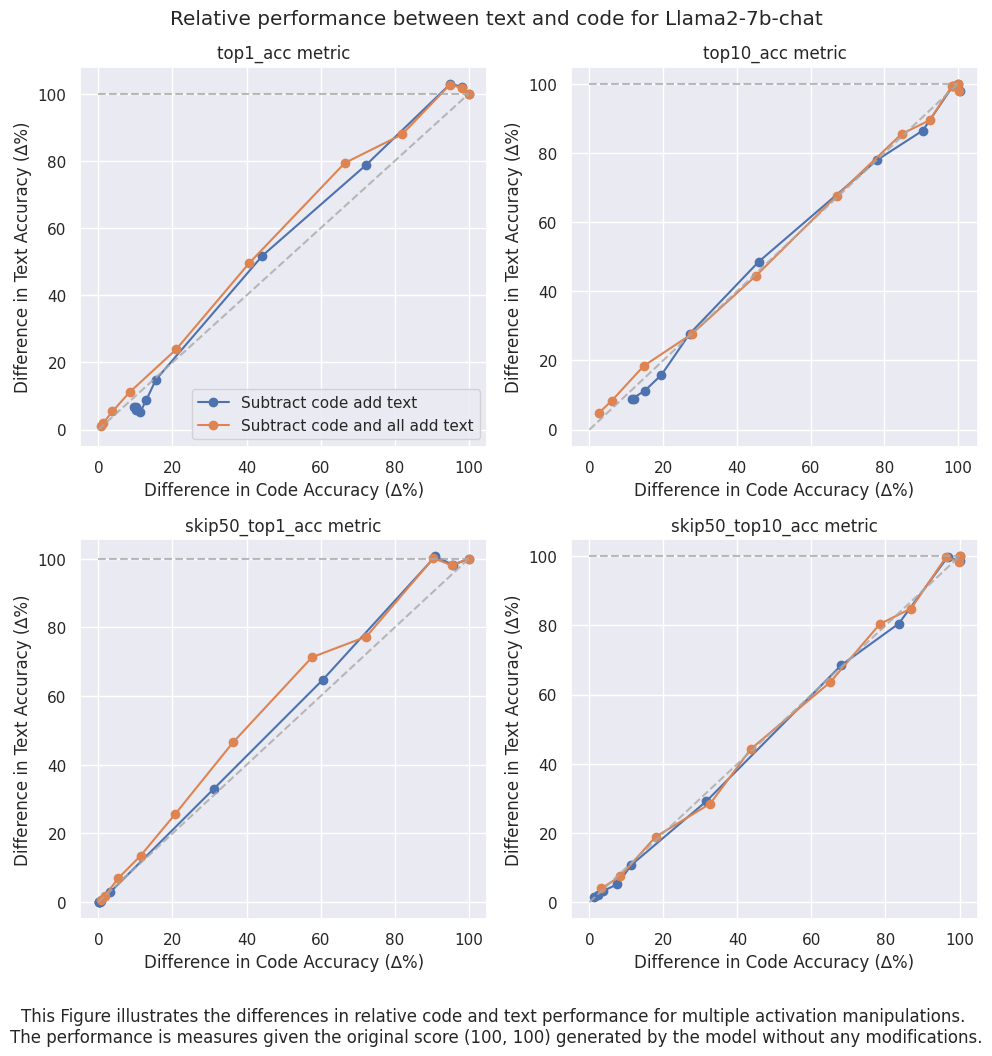

In [19]:
# create a seaborn style graph
sns.set_theme()

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
scale = 100

for metric, ax in zip(metrics, axs.reshape(-1)):
    ax.plot(scores1["only_code"][metric]["rel"], scores1['only_text'][metric]["rel"], marker="o", label="Subtract code add text")
    ax.plot(scores2["only_code"][metric]["rel"], scores2['only_text'][metric]["rel"], marker="o", label="Subtract code and all add text")
    ax.plot(scores2["only_code"][metric]["rel"], scores2['only_text'][metric]["rel"], marker="o", label="Subtract code and all add text")
    # ax.plot(rand_rel["only_code"][metric], rand_rel['only_text'][metric], marker="o", label="Subtract random activations")
    # ax.plot(acts_rel["only_code"][metric], acts_rel['only_text'][metric], marker="o", label="Subtract average activations")
    # ax.plot(pos_acts_rel["only_code"][metric], pos_acts_rel['only_text'][metric], marker="o", label="Add average activations")
    ax.set_title(f"{metric} metric")
    ax.set_xlabel("Difference in Code Accuracy (∆%)")
    ax.set_ylabel("Difference in Text Accuracy (∆%)")

    ax.plot([0, scale], [scale, scale], color="darkgray", linestyle="--", alpha=0.8)
    ax.plot([0, scale], [0,     scale], color="darkgray", linestyle="--", alpha=0.8)

# title = results["meta"]["model_name"].split("/")[1]
axs[0, 0].legend()
title = "Relative performance between text and code for Llama2-7b-chat"
txt = """This Figure illustrates the differences in relative code and text performance for multiple activation manipulations. 
The performance is measures given the original score (100, 100) generated by the model without any modifications."""
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)

plt.suptitle(title)
fig.tight_layout()
plt.show()

In [ ]:
with open("../results/alignment_tax_v1.03.json", "r") as f:
    random_results = json.load(f)
with open("../results/alignment_tax_v1.04.json", "r") as f:
    acts_results = json.load(f)
with open("../results/alignment_tax_v1.05.json", "r") as f:
    pos_acts_results = json.load(f)

same = random_results["only_code"].keys() == acts_results["only_code"].keys()
print(f"Are both results with the same ICs?: {same}")
random_results["meta"], acts_results['meta']

In [ ]:
# create a seaborn style graph
sns.set_theme()

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
scale = 100

for metric, ax in zip(metrics, axs.reshape(-1)):
    ax.plot(rand_rel["only_code"][metric], rand_rel['only_text'][metric], marker="o", label="Subtract random activations")
    ax.plot(acts_rel["only_code"][metric], acts_rel['only_text'][metric], marker="o", label="Subtract average activations")
    ax.plot(pos_acts_rel["only_code"][metric], pos_acts_rel['only_text'][metric], marker="o", label="Add average activations")
    ax.set_title(f"{metric} metric")
    ax.set_xlabel("Difference in Code Accuracy (∆%)")
    ax.set_ylabel("Difference in Text Accuracy (∆%)")

    ax.plot([0, scale], [scale, scale], color="darkgray", linestyle="--", alpha=0.8)
    ax.plot([0, scale], [0,     scale], color="darkgray", linestyle="--", alpha=0.8)

# title = results["meta"]["model_name"].split("/")[1]
axs[0, 0].legend()
title = "Relative performance between text and code for Llama2-7b-chat"
txt = """This Figure illustrates the differences in relative code and text performance for multiple activation manipulations. 
The performance is measures given the original score (100, 100) generated by the model without any modifications."""
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)

plt.suptitle(title)
fig.tight_layout()
plt.show()

In [ ]:
# create a seaborn style graph
sns.set_theme()
fig, axs = plt.subplots(2, 2, figsize=(10,10))
scale = 100
ic_ints = [ic.split("_")[2] for ic in injection_coefficients]


for metric, ax in zip(metrics, axs.reshape(-1)):
    ax.scatter(ic_ints, rand_rel['only_text'][metric], marker=".", alpha=0.7, c="blue", label="Subtract andom Text")
    ax.scatter(ic_ints, rand_rel['only_code'][metric], marker="D", alpha=0.7, c="blue", label="Subtract andom Code")
    ax.scatter(ic_ints, acts_rel['only_text'][metric], marker=".", alpha=0.7, c="orange", label="Subtract activations Text")
    ax.scatter(ic_ints, acts_rel['only_code'][metric], marker="D", alpha=0.7, c="orange", label="Subtract activations Code")
    ax.scatter(ic_ints, pos_acts_rel['only_text'][metric], marker=".", alpha=0.7, c="green", label="Add activations Text")
    ax.scatter(ic_ints, pos_acts_rel['only_code'][metric], marker="D", alpha=0.7, c="green", label="Add activations Code")

    ax.set_title(f"{metric} metric")
    ax.set_xlabel("Injection Coefficients")
    ax.set_ylabel("Score in %")

axs[0, 0].legend()
plt.suptitle("Relative scores:" + title)
fig.tight_layout()
plt.show() 

In [ ]:
# create a seaborn style graph
sns.set_theme()
fig, axs = plt.subplots(2, 2, figsize=(12, 12))#, sharex=True, sharey=True)
scale = 100
ic_ints = [ic.split("_")[2] for ic in injection_coefficients]

for metric, ax in zip(metrics, axs.reshape(-1)):
    ax.set_ylim([0, 100])

    ax.scatter(ic_ints, rand_avg['only_text'][metric], marker=".", alpha=0.7, c="blue", label="Random Text")
    ax.scatter(ic_ints, rand_avg['only_code'][metric], marker="D", alpha=0.7, c="blue", label="Random Code")
    ax.scatter(ic_ints, acts_avg['only_text'][metric], marker=".", alpha=0.7, c="orange", label="ActAdd Text")
    ax.scatter(ic_ints, acts_avg['only_code'][metric], marker="D", alpha=0.7, c="orange", label="ActAdd Code")
    ax.scatter(ic_ints, pos_acts_avg['only_text'][metric], marker=".", alpha=0.7, c="green", label="Add activations Text")
    ax.scatter(ic_ints, pos_acts_avg['only_code'][metric], marker="D", alpha=0.7, c="green", label="Add activations Code")
    
    ax.set_title(f"{metric} metric")

    ax.set_xlabel("Injection Coefficients")
    ax.set_ylabel("Score in %")
    
plt.legend()
plt.suptitle("Average scores:" + title)
fig.tight_layout()
plt.show()

In [ ]:
with open("../results/alignment_tax_v1.02.json", "r") as f:
    f16_results = json.load(f)

with open("../results/alignment_tax_v1.03.json", "r") as f:
    bf16_results = json.load(f)

f16_results['meta'], bf16_results['meta']

In [ ]:
#TODO: really messy code, should work on changing the structuring of the results
f16_speeds, bf16_speeds = [], []
modes = ("only_text", "only_code")
f16_ics = list(f16_results["only_code"].keys())
bf16_ics = list(bf16_results["only_code"].keys())

for mode in modes:
    accs[mode] = {}
    
    for ic in f16_ics:
        keys_batches = f16_results[mode][ic].keys()
        for batch in keys_batches:
            f16_speeds.append(f16_results[mode][ic][batch]["total_time_in_sec"])

    for ic in bf16_ics:
        keys_batches = bf16_results[mode][ic].keys()
        for batch in keys_batches:
            bf16_speeds.append(bf16_results[mode][ic][batch]["total_time_in_sec"])

In [ ]:
def avg_speed(x):
    return sum(x) / len(x)

print(f"f16 avg speed: {avg_speed(f16_speeds)}")
print(f"bf16 avg speed: {avg_speed(bf16_speeds)}")

In [ ]:
4*32*4096

In [ ]:
26_000_000_000 / 524288


In [ ]:
40*128